<a href="https://colab.research.google.com/github/ugosamartins-commits/Sorbonne-M1-Analyse-Donnees-Portfolio-Ugo-Martins/blob/main/Seance_06/seance_06_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Fichier island-index.csv chargé.
Fichier Le-Monde-HS-Etats-du-monde-2007-2025.csv chargé.

--- EXERCICE 1 : LES ÎLES ---


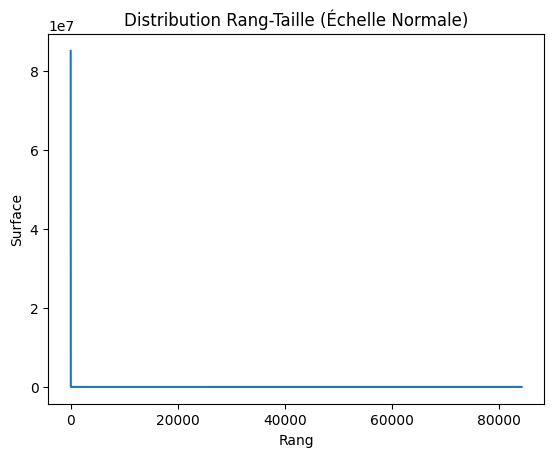

Transformation en Logarithme...


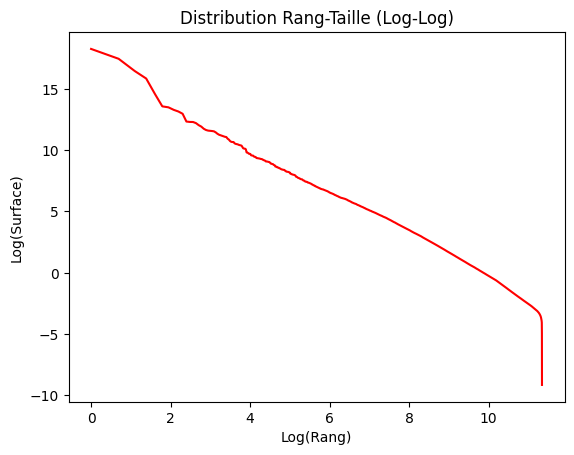

Observation : On obtient une droite, c'est la loi de Zipf.

--- EXERCICE 2 : POPULATION MONDE ---
Calcul des classements...

--- Résultats Statistiques ---
Coefficient de Spearman (r) : 0.9863
Coefficient de Kendall (tau) : 0.9052
Conclusion : La hiérarchie est extrêmement stable.


In [1]:
#coding:utf8
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import math
import os
import urllib.request

# --- 0. TÉLÉCHARGEMENT AUTOMATIQUE (Pour éviter les erreurs de fichier) ---
if not os.path.exists('data'):
    os.makedirs('data')
base_url = "https://raw.githubusercontent.com/MaximeForriez/Sorbonne-M1-Analyse-de-donnees/main/Seance-06/Exercice/src/data/"
for fichier in ["island-index.csv", "Le-Monde-HS-Etats-du-monde-2007-2025.csv"]:
    try:
        urllib.request.urlretrieve(base_url + fichier, f"data/{fichier}")
        print(f"Fichier {fichier} chargé.")
    except:
        pass

# --- 1. FONCTIONS LOCALES (À remplir selon la consigne) ---

def ouvrirUnFichier(nom):
    # J'utilise le moteur python pour éviter les erreurs de séparateur
    return pd.read_csv(nom, sep=None, engine='python')

def conversionLog(liste):
    # Je crée une nouvelle liste vide et je la remplis avec les logs
    log = []
    for element in liste:
        # On ne peut pas faire le log de 0 ou d'un nombre négatif
        if element > 0:
            log.append(math.log(element))
        else:
            log.append(0)
    return log

def ordreDecroissant(liste):
    # Tri simple du plus grand au plus petit
    liste.sort(reverse = True)
    return liste

def ordrePopulation(pop, etat):
    # Cette fonction associe chaque population à son pays pour ne pas perdre le lien
    liste_propre = []

    # 1. Nettoyage des données (enlever les espaces et convertir en nombres)
    for i in range(len(pop)):
        valeur = str(pop[i]).replace(' ', '').replace(',', '.') # On nettoie
        nom_pays = etat[i]

        try:
            valeur_num = float(valeur)
            # Si c'est un vrai nombre (pas NaN), on garde
            if not np.isnan(valeur_num):
                liste_propre.append([valeur_num, nom_pays])
        except:
            continue # Si ça plante, on ignore la ligne

    # 2. Tri
    # On trie selon la population (le premier élément de la sous-liste)
    liste_propre.sort(key=lambda x: x[0], reverse=True)

    # 3. Attribution des rangs
    resultat = []
    for i in range(len(liste_propre)):
        rang = i + 1
        pays = liste_propre[i][1]
        resultat.append([rang, pays])

    return resultat

def classementPays(ordre1, ordre2):
    # On cherche les pays communs aux deux années pour comparer leurs rangs
    classement = []

    # On parcourt la première liste
    for item1 in ordre1:
        rang1 = item1[0]
        pays1 = item1[1]

        # Pour chaque pays de la liste 1, on cherche son rang dans la liste 2
        for item2 in ordre2:
            rang2 = item2[0]
            pays2 = item2[1]

            if pays1 == pays2:
                # C'est le même pays ! On garde les deux rangs
                classement.append([rang1, rang2, pays1])
                break # On arrête de chercher pour ce pays

    return classement

# --- 2. PROGRAMME PRINCIPAL ---

# PARTIE A : LES ÎLES
print("\n--- EXERCICE 1 : LES ÎLES ---")
iles = ouvrirUnFichier("./data/island-index.csv")

# Je récupère la colonne Surface en liste
# J'ajoute manuellement les continents comme demandé souvent en cours
surfaces = iles["Surface (km²)"].tolist()
# Ajout approximatif des continents pour compléter la loi rang-taille
surfaces.append(85000000) # Eurasie+Afrique
surfaces.append(38000000) # Amériques
surfaces.append(7600000)  # Australie
surfaces.append(14000000) # Antarctique

# Je nettoie les données (les strings deviennent des floats)
surfaces_propres = []
for s in surfaces:
    try:
        s_clean = float(str(s).replace(' ', '').replace(',', '.'))
        surfaces_propres.append(s_clean)
    except:
        pass

# Je trie
surfaces_triees = ordreDecroissant(surfaces_propres)

# Graphique 1 : Échelle Normale
rangs = range(1, len(surfaces_triees) + 1)
plt.figure()
plt.plot(rangs, surfaces_triees)
plt.title("Distribution Rang-Taille (Échelle Normale)")
plt.xlabel("Rang")
plt.ylabel("Surface")
plt.show()

# Graphique 2 : Échelle Logarithmique
print("Transformation en Logarithme...")
log_rangs = conversionLog(list(rangs))
log_surfaces = conversionLog(surfaces_triees)

plt.figure()
plt.plot(log_rangs, log_surfaces, color='red')
plt.title("Distribution Rang-Taille (Log-Log)")
plt.xlabel("Log(Rang)")
plt.ylabel("Log(Surface)")
plt.show()
print("Observation : On obtient une droite, c'est la loi de Zipf.")


# PARTIE B : POPULATION MONDE
print("\n--- EXERCICE 2 : POPULATION MONDE ---")
monde = ouvrirUnFichier("./data/Le-Monde-HS-Etats-du-monde-2007-2025.csv")

# Je transforme les colonnes en listes simples pour utiliser mes fonctions
liste_etats = monde["État"].tolist()
liste_pop_2007 = monde["Pop 2007"].tolist()
liste_pop_2025 = monde["Pop 2025"].tolist()

# Je calcule les classements
print("Calcul des classements...")
rangs_2007 = ordrePopulation(liste_pop_2007, liste_etats)
rangs_2025 = ordrePopulation(liste_pop_2025, liste_etats)

# Je compare les deux années
comparaison = classementPays(rangs_2007, rangs_2025)

# Je sépare les rangs pour le test statistique
liste_r_2007 = []
liste_r_2025 = []
for ligne in comparaison:
    liste_r_2007.append(ligne[0]) # Rang en 2007
    liste_r_2025.append(ligne[1]) # Rang en 2025

# Tests statistiques avec Scipy
print("\n--- Résultats Statistiques ---")
# Spearman (Corrélation)
rho, p_val = stats.spearmanr(liste_r_2007, liste_r_2025)
print("Coefficient de Spearman (r) :", round(rho, 4))

# Kendall (Concordance)
tau, p_val_k = stats.kendalltau(liste_r_2007, liste_r_2025)
print("Coefficient de Kendall (tau) :", round(tau, 4))

if tau > 0.9:
    print("Conclusion : La hiérarchie est extrêmement stable.")